In [55]:
import numpy as np
import random

## Code from previous class

In [72]:
class TrafficSimulation():
    
    def __init__(self, length = 100, density = 0.2, max_velocity = 5, prob = 0.5):
        # Here, we define the model parameters (road length, traffic density, maximum velocity, 
        # probability of slowing down) 
        self.length = length # The length of the road (number of cells)
        self.density = density # The density of traffic
        self.max_velocity = max_velocity # The maximum speed of the cars
        self.slow_prob = prob # The probability of slowing down for no apparent reason
        self.state = -np.ones(self.length, dtype=int) # "-1" represents an empty cell
        filled_cells = np.random.choice(range(self.length), size=int(round(density * self.length)), replace=False)
        self.state[filled_cells] = np.random.randint(0, self.max_velocity + 1, size=len(filled_cells))
            
    
    def changeSpeed(self, display = True):                
        for i in range(self.length):
            if self.state[i] != -1: # We only change the speed if there's a car in the cell
                dist = 0 # Algorithm that scans the grids in front of the car until it finds the next car
                while self.state[(i + (dist + 1)) % self.length] == -1:
                        dist += 1
                # Here we will code for the 3 rules for speed change in the Nagel-Schreckenberg model
                if dist > self.state[i] and self.state[i] < self.max_velocity:
                    self.state[i] += 1
                if dist < self.state[i]:
                    self.state[i] = dist 
                if self.state[i] > 0 and np.random.random() < self.slow_prob:
                    self.state[i] -= 1                   
        
        if display == True: # Display the model
            self.display()
        
        # Here we are coding for the last rule in the Nagel-Schrekenberg model - the movement rule
        next_state = -np.ones(self.length, dtype=int) 
        for i in range(self.length):
            if self.state[i] != -1:
                next_state[(i + self.state[i]) % self.length] = self.state[i]
        self.state = next_state    
  
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))
        
sim = TrafficSimulation()
for i in range(50):
    sim.changeSpeed()  

.........0..........01.4.......003....02.....5......0.0.......................1.....00...1.01..2..4.
..4......0..........1.1....3...00...0.1..3........0.1.0........................1....01....01.1...3..
4.....1..0...........1.2......000...1..1....4.....0..00.........................2...0.1...0.0.2.....
....1..0.1............1..2....001....1..2.......1.1..00...........................1.1..1..1.1...3...
.....0.0..2............2...1..01.2....2...3......0.1.00............................0.1..2..1.1.....4
...1.0.1....2............2..0.0.1..2....2....2...1..001............................1..1...1.1.1.....
....00..2.....2............01.0..2...3....2....1..0.00.2............................1..1...1.0.2....
....01....2.....3..........0.01....3....2...3...1.1.01...2...........................1..1...01...2..
....1.2.....2......3.......1.1.1......3...3....1.1.00.2....3..........................2..1..0.2....3
..1..2..3.....3.......3.....1.1.1........2...1..1.000...2.....4.........................1.1

## Measure the Flow Rate

In [74]:
class TrafficSimulation():
    
    def __init__(self, length = 100, density = 0.2, max_velocity = 5, prob = 0.5):
        # Here, we define the model parameters (road length, traffic density, maximum velocity, 
        # probability of slowing down) 
        self.length = length # The length of the road (number of cells)
        self.density = density # The density of traffic
        self.max_velocity = max_velocity # The maximum speed of the cars
        self.slow_prob = prob # The probability of slowing down for no apparent reason
        self.state = -np.ones(self.length, dtype=int) # "-1" represents an empty cell
        filled_cells = np.random.choice(range(self.length), size=int(round(density * self.length)), replace=False)
        self.state[filled_cells] = np.random.randint(0, self.max_velocity + 1, size=len(filled_cells))
        self.time_step = 0 # Adding new parameters to measure traffic flow
        self.total_traffic_flow = 0 
    
    def changeSpeed(self, display = False): # Changing this to False because we will be running this multiple times
                                            # and we don't want the model to be printed every time
        for i in range(self.length):
            if self.state[i] != -1: # We only change the speed if there's a car in the cell
                dist = 0 # Algorithm that scans the grids in front of the car until it finds the next car
                while self.state[(i + (dist + 1)) % self.length] == -1:
                        dist += 1
                # Here we will code for the 3 rules for speed change in the Nagel-Schreckenberg model
                if dist > self.state[i] and self.state[i] < self.max_velocity:
                    self.state[i] += 1
                if dist < self.state[i]:
                    self.state[i] = dist 
                if self.state[i] > 0 and np.random.random() < self.slow_prob:
                    self.state[i] -= 1                   
        
        if display == True: # Display the model
            self.display()
        
        # Here we are coding for the last rule in the Nagel-Schrekenberg model - the movement rule
        next_state = -np.ones(self.length, dtype=int) 
        for i in range(self.length):
            if self.state[i] != -1:
                next_state[(i + self.state[i]) % self.length] = self.state[i]
        self.state = next_state    
        
        # For every time step, we add the traffic flow measured in that time step to total_traffic_flow
        self.time_step += 1
        for i in range(self.max_velocity):
            if self.state[i] > i:
                self.total_traffic_flow += 1
  
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))
        
sim = TrafficSimulation()
for i in range(50):
    sim.changeSpeed()  

In [84]:
density_list = []
traffic_flow_list = []
for density in range(1, 101):
    sim = TrafficSimulation(density=density/100)
    print('Traffic density:', sim.density)
    density_list.append(sim.density)
    
    trial_flow = []
    for trial in range(20): # Repeating each time steps by 20 times to get the average value
        for i in range(200): # Run the simulation for 200 timesteps to get the average flow rate
            sim.changeSpeed()
        trial_flow.append(sim.total_traffic_flow / sim.time_step)
    traffic_flow_list.append(sum(trial_flow)/len(trial_flow))
    print('Average traffic flow:', sum(trial_flow)/len(trial_flow))

Traffic density: 0.01
Average traffic flow: 0.04500000000000001
Traffic density: 0.02
Average traffic flow: 0.08897556508571408
Traffic density: 0.03
Average traffic flow: 0.13394338788791188
Traffic density: 0.04
Average traffic flow: 0.1796713984190474
Traffic density: 0.05
Average traffic flow: 0.2232780415061375
Traffic density: 0.06
Average traffic flow: 0.267825579115372
Traffic density: 0.07
Average traffic flow: 0.3140758225703176
Traffic density: 0.08
Average traffic flow: 0.3554552896181476
Traffic density: 0.09
Average traffic flow: 0.3950752343588644
Traffic density: 0.1
Average traffic flow: 0.41719429468450364
Traffic density: 0.11
Average traffic flow: 0.35310376013412975
Traffic density: 0.12
Average traffic flow: 0.3195380561464249
Traffic density: 0.13
Average traffic flow: 0.3046729224518602
Traffic density: 0.14
Average traffic flow: 0.32583499617857203
Traffic density: 0.15
Average traffic flow: 0.3034859857269494
Traffic density: 0.16
Average traffic flow: 0.30225

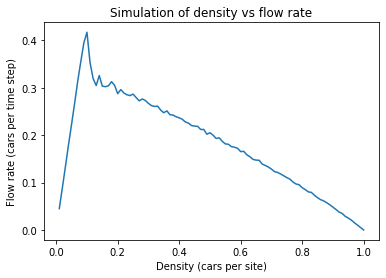

In [85]:
import matplotlib.pyplot as plt

plt.plot(density_list, traffic_flow_list)
plt.xlabel("Density (cars per site)")
plt.ylabel("Flow rate (cars per time step)")
plt.title("Simulation of density vs flow rate")
plt.show()